In [132]:
                           # This project is a Speech Emotion Recognition for Emotional Analyzer #

In [133]:
                                           # -Before Beginning- #
# Python 3.5 or latest version should be installed #
# The Following libraries will be used throughout the article, make sure you’ve installed it before trying out the codes #
# (librosa, keras, tensorflow, scikit-learn, numpy, scipy, matplotlib,python_speech_features, pandas, preprocessing or preprocess) #
# This project code run use of jupyter nootbook in python3 #

In [134]:
# The neural network model is capable of detecting five different male/female emotions from audio speeches.
# Natural Language Processing, Deep Learning, Python. #

In [135]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
import os
import kwargs
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
from python_speech_features import mfcc
from python_speech_features import logfbank

In [136]:
# Set the dataset path file #
mylist= os.listdir('Ravdss dataset/')

In [137]:
type(mylist)

list

In [138]:
# the total audio files in your dataset file #
print(mylist[1011])
print(mylist[1011][6:-16])

03-02-06-02-02-02-24.wav
06


In [139]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

In [140]:
labels = pd.DataFrame(feeling_list)

In [141]:
labels[:10]

,0
0,male_calm
1,female_calm
2,male_calm
3,female_calm
4,male_calm
5,female_calm
6,male_calm
7,female_calm
8,male_calm
9,female_calm


In [142]:
labels = pd.DataFrame(feeling_list)

In [143]:
                                          # The MFCC model for feature extraction #

In [144]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('Ravdss dataset/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=30),axis=0) # nmfcc=30 #
        
        feature = mfccs
        ##librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', *kwargs)
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [-(feature/90)] # feature parameter/120 #
        bookmark=bookmark+1 

In [147]:
data, sampling_rate = librosa.load('Ravdss dataset/03-02-01-01-02-01-16.wav')

Populating the interactive namespace from numpy and matplotlib


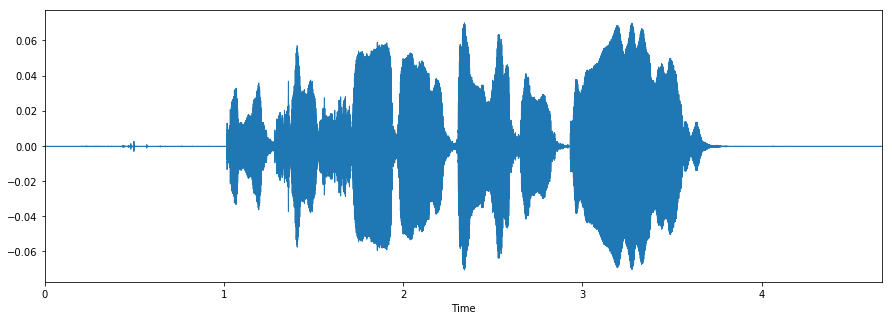

In [148]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

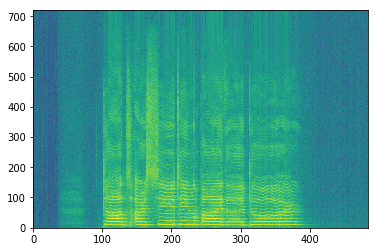

In [149]:
sr,x = scipy.io.wavfile.read('Ravdss dataset/03-02-01-01-02-01-02.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [150]:
df[:7]

,feature
0,"[0.29515146403619313, 0.2967826237946707, 0.29..."
1,"[0.28573063603164656, 0.28573063603164656, 0.2..."
2,"[0.22385823951544473, 0.20664520943133552, 0.2..."
3,"[0.2891481100328095, 0.289200601014271, 0.2859..."
4,"[0.2724534690579167, 0.28286445063412785, 0.29..."
5,"[0.3266169260197195, 0.3266169260197195, 0.326..."
6,"[0.32108839579714, 0.32108839579714, 0.3210883..."


In [151]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [152]:
newdf = pd.concat([df3,labels], axis=1)

In [153]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [154]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,0.295151,0.296783,0.296827,0.296957,0.282657,0.270154,0.280082,0.280571,0.274069,0.280028,...,0.205792,0.189550,0.193413,0.188902,0.199243,0.207047,0.207789,0.152712,0.122110,male_calm
1,0.285731,0.285731,0.285731,0.285731,0.285731,0.285731,0.285731,0.285731,0.285731,0.285731,...,0.181855,0.190762,0.197329,0.181767,0.175351,0.178923,0.180700,0.098532,0.060443,female_calm
2,0.223858,0.206645,0.210091,0.230477,0.208367,0.202252,0.211089,0.219146,0.212346,0.211877,...,0.152670,0.163082,0.160383,0.158190,0.164906,0.171528,0.170686,0.179036,0.156612,male_calm
3,0.289148,0.289201,0.285920,0.277634,0.279489,0.277335,0.279819,0.279755,0.277184,0.282977,...,0.173721,0.182934,0.200154,0.201236,0.214796,0.217800,0.227942,0.197818,0.159022,female_calm
4,0.272453,0.282864,0.294559,0.256772,0.256673,0.289258,0.301287,0.263764,0.253580,0.261487,...,0.265324,0.259831,0.257955,0.262884,0.249615,0.233824,0.214426,0.189383,0.162207,male_calm


In [155]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
829,0.246446,0.246446,0.246462,0.245707,0.243596,0.240440,0.243553,0.240941,0.242423,0.239429,...,0.181766,0.163174,0.165462,0.176811,0.164955,0.157056,0.168935,0.131272,0.095373,female_fearful
238,0.279073,0.279183,0.279434,0.280807,0.283248,0.279747,0.274499,0.277641,0.273959,0.270006,...,0.173670,0.157141,0.153425,0.143522,0.139555,0.146723,0.151801,0.134983,0.092591,male_happy
609,0.257390,0.257390,0.257390,0.250974,0.244887,0.251428,0.254551,0.241277,0.237215,0.241574,...,0.209498,0.222681,0.219530,0.217483,0.225421,0.218550,0.211556,0.130365,0.095433,female_angry
707,0.225707,0.235616,0.229821,0.222726,0.241499,0.233346,0.234005,0.247717,0.248175,0.248175,...,0.106097,0.106022,0.114361,0.108113,0.120442,0.119563,0.135155,0.107954,0.069812,male_angry
719,0.257859,0.257859,0.257859,0.257859,0.257859,0.257859,0.257859,0.257859,0.257859,0.257859,...,0.138331,0.135018,0.130260,0.127016,0.123678,0.106584,0.103409,0.078401,0.040659,male_angry
834,0.276446,0.276446,0.276446,0.276446,0.276446,0.276446,0.276446,0.276446,0.276446,0.267625,...,0.189924,0.186119,0.198730,0.178565,0.178077,0.178640,0.180709,0.119941,0.079016,male_fearful
353,0.269263,0.269263,0.269263,0.269263,0.269263,0.269263,0.269239,0.269263,0.269206,0.269263,...,0.110987,0.105030,0.105095,0.108727,0.122475,0.130397,0.124620,0.105734,0.088731,male_happy
483,0.284447,0.261811,0.256907,0.280342,0.279099,0.273444,0.279627,0.279546,0.276469,0.288927,...,0.236389,0.249176,0.250368,0.240494,0.242502,0.241413,0.231487,0.152567,0.115628,male_sad
11,0.283037,0.283037,0.283037,0.283037,0.283037,0.283037,0.283037,0.283037,0.283037,0.283037,...,0.189332,0.190535,0.182729,0.187927,0.176026,0.169850,0.170915,0.121420,0.088647,female_calm
320,0.220886,0.209616,0.208160,0.202151,0.207954,0.202642,0.207981,0.216088,0.219258,0.221835,...,0.166710,0.156572,0.151583,0.167189,0.158778,0.152712,0.165766,0.088184,0.046565,male_happy


In [156]:
rnewdf=rnewdf.fillna(0)

In [157]:
# Separate the dataset intot train data and test data #

In [158]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [159]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
447,0.237894,0.242701,0.241539,0.235683,0.225651,0.235416,0.235662,0.238092,0.235472,0.239594,...,0.157225,0.171869,0.186244,0.195355,0.187380,0.188820,0.196584,0.179462,0.146212,male_sad
699,0.204159,0.195728,0.184943,0.186028,0.187439,0.196558,0.201742,0.203203,0.205470,0.213421,...,0.061187,0.045389,0.074485,0.094465,0.108102,0.113301,0.121997,0.035202,0.002039,female_angry
607,0.205796,0.200850,0.205795,0.200657,0.191976,0.198475,0.193269,0.188477,0.202345,0.208272,...,0.185138,0.167990,0.148044,0.149485,0.127152,0.090713,0.084116,0.067309,0.036291,female_angry
704,0.226856,0.205789,0.192883,0.187173,0.198548,0.206356,0.202290,0.213570,0.222909,0.204200,...,0.145260,0.155309,0.153462,0.150521,0.138590,0.143463,0.152632,0.132616,0.124539,male_angry
903,0.271345,0.271345,0.271345,0.271362,0.271873,0.272719,0.273428,0.273584,0.274274,0.273643,...,0.173129,0.169911,0.185137,0.178063,0.168018,0.166875,0.163460,0.152421,0.146977,male_fearful
851,0.203695,0.185914,0.190260,0.187927,0.192516,0.200439,0.225559,0.225090,0.219230,0.195754,...,0.178400,0.186153,0.186307,0.181441,0.181028,0.178670,0.180785,0.156615,0.114705,male_fearful
232,0.257181,0.257181,0.257181,0.257181,0.257181,0.257181,0.257181,0.257181,0.257181,0.257181,...,0.117534,0.118810,0.126082,0.129565,0.125422,0.132241,0.135706,0.104058,0.064744,male_happy
492,0.210981,0.210444,0.206175,0.201757,0.203608,0.213393,0.210875,0.207695,0.200978,0.202771,...,0.178569,0.182420,0.180292,0.176046,0.176432,0.177385,0.184163,0.131967,0.096334,female_sad
379,0.260393,0.260393,0.260393,0.260393,0.260405,0.260240,0.258587,0.259910,0.257059,0.258902,...,0.146093,0.156327,0.154800,0.155751,0.158204,0.172117,0.188303,0.127340,0.092238,female_sad
251,0.237899,0.239267,0.242617,0.245542,0.246236,0.224585,0.221408,0.229745,0.222084,0.214018,...,0.196358,0.191286,0.178729,0.175330,0.168386,0.173716,0.174627,0.134709,0.099015,male_happy


In [160]:
trainfeatures = train.iloc[:, :-1]

In [161]:
trainlabel = train.iloc[:, -1:]

In [162]:
testfeatures = test.iloc[:, :-1]

In [163]:
testlabel = test.iloc[:, -1:]

In [164]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [165]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [166]:
X_train.shape

(709, 216)

In [167]:
# Changing dimension for CNN model #

In [168]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn =np.expand_dims(X_test, axis=2)

In [169]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(10))) # model.add(MaxPooling1D(pool_size=(8)))#
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [170]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_6 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_7 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 21, 128)           82048     
__________

In [171]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [172]:
# train the CNN model "you can reduce the (epochs)"

In [173]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=300, validation_data=(x_testcnn, y_test))

Train on 709 samples, validate on 211 samples
Epoch 1/300
709/709 [==============================] - 3s 4ms/step - loss: 2.3027 - acc: 0.0987 - val_loss: 2.3024 - val_acc: 0.0853
Epoch 2/300
709/709 [==============================] - 3s 4ms/step - loss: 2.3023 - acc: 0.0987 - val_loss: 2.3023 - val_acc: 0.0853
Epoch 3/300
709/709 [==============================] - 3s 4ms/step - loss: 2.3020 - acc: 0.0987 - val_loss: 2.3021 - val_acc: 0.0853
Epoch 4/300
709/709 [==============================] - 3s 4ms/step - loss: 2.3018 - acc: 0.0987 - val_loss: 2.3020 - val_acc: 0.0853
Epoch 5/300
709/709 [==============================] - 3s 4ms/step - loss: 2.3016 - acc: 0.0987 - val_loss: 2.3020 - val_acc: 0.0853
Epoch 6/300
709/709 [==============================] - 3s 4ms/step - loss: 2.3013 - acc: 0.0987 - val_loss: 2.3019 - val_acc: 0.0853
Epoch 7/300
709/709 [==============================] - 3s 4ms/step - loss: 2.3011 - acc: 0.0987 - val_loss: 2.3018 - val_acc: 0.0853
Epoch 8/300
709/709 [==

709/709 [==============================] - 3s 4ms/step - loss: 2.1489 - acc: 0.2567 - val_loss: 2.1475 - val_acc: 0.2607
Epoch 62/300
709/709 [==============================] - 3s 4ms/step - loss: 2.1395 - acc: 0.2652 - val_loss: 2.1383 - val_acc: 0.2607
Epoch 63/300
709/709 [==============================] - 3s 4ms/step - loss: 2.1325 - acc: 0.2623 - val_loss: 2.1299 - val_acc: 0.2559
Epoch 64/300
709/709 [==============================] - 3s 4ms/step - loss: 2.1239 - acc: 0.2595 - val_loss: 2.1203 - val_acc: 0.2512
Epoch 65/300
709/709 [==============================] - 3s 4ms/step - loss: 2.1152 - acc: 0.2623 - val_loss: 2.1104 - val_acc: 0.2559
Epoch 66/300
709/709 [==============================] - 3s 4ms/step - loss: 2.1079 - acc: 0.2567 - val_loss: 2.1023 - val_acc: 0.2512
Epoch 67/300
709/709 [==============================] - 3s 4ms/step - loss: 2.1003 - acc: 0.2595 - val_loss: 2.0985 - val_acc: 0.2275
Epoch 68/300
709/709 [==============================] - 3s 4ms/step - loss:

709/709 [==============================] - 3s 4ms/step - loss: 1.9784 - acc: 0.2793 - val_loss: 1.9358 - val_acc: 0.2796
Epoch 123/300
709/709 [==============================] - 3s 4ms/step - loss: 1.9769 - acc: 0.2835 - val_loss: 1.9379 - val_acc: 0.2796
Epoch 124/300
709/709 [==============================] - 3s 4ms/step - loss: 1.9759 - acc: 0.2807 - val_loss: 1.9333 - val_acc: 0.3223
Epoch 125/300
709/709 [==============================] - 3s 4ms/step - loss: 1.9738 - acc: 0.2906 - val_loss: 1.9346 - val_acc: 0.2891
Epoch 126/300
709/709 [==============================] - 3s 4ms/step - loss: 1.9746 - acc: 0.2891 - val_loss: 1.9336 - val_acc: 0.2796
Epoch 127/300
709/709 [==============================] - 3s 4ms/step - loss: 1.9708 - acc: 0.2835 - val_loss: 1.9297 - val_acc: 0.3081
Epoch 128/300
709/709 [==============================] - 3s 4ms/step - loss: 1.9727 - acc: 0.2920 - val_loss: 1.9285 - val_acc: 0.3175
Epoch 129/300
709/709 [==============================] - 3s 4ms/step 

Epoch 183/300
709/709 [==============================] - 3s 4ms/step - loss: 1.9081 - acc: 0.3103 - val_loss: 1.8800 - val_acc: 0.3081
Epoch 184/300
709/709 [==============================] - 3s 4ms/step - loss: 1.9019 - acc: 0.3061 - val_loss: 1.8764 - val_acc: 0.3270
Epoch 185/300
709/709 [==============================] - 3s 4ms/step - loss: 1.9042 - acc: 0.3286 - val_loss: 1.8741 - val_acc: 0.3128
Epoch 186/300
709/709 [==============================] - 3s 4ms/step - loss: 1.9000 - acc: 0.3202 - val_loss: 1.8875 - val_acc: 0.2986
Epoch 187/300
709/709 [==============================] - 3s 4ms/step - loss: 1.8988 - acc: 0.3159 - val_loss: 1.8766 - val_acc: 0.3270
Epoch 188/300
709/709 [==============================] - 3s 4ms/step - loss: 1.8995 - acc: 0.3202 - val_loss: 1.8808 - val_acc: 0.3128
Epoch 189/300
709/709 [==============================] - 3s 4ms/step - loss: 1.8936 - acc: 0.3173 - val_loss: 1.8854 - val_acc: 0.3033
Epoch 190/300
709/709 [==============================] 

709/709 [==============================] - 3s 4ms/step - loss: 1.8087 - acc: 0.3568 - val_loss: 1.8172 - val_acc: 0.3223
Epoch 244/300
709/709 [==============================] - 3s 4ms/step - loss: 1.8082 - acc: 0.3583 - val_loss: 1.8146 - val_acc: 0.3270
Epoch 245/300
709/709 [==============================] - 3s 4ms/step - loss: 1.8031 - acc: 0.3667 - val_loss: 1.8273 - val_acc: 0.3270
Epoch 246/300
709/709 [==============================] - 3s 4ms/step - loss: 1.8015 - acc: 0.3639 - val_loss: 1.8128 - val_acc: 0.3128
Epoch 247/300
709/709 [==============================] - 3s 4ms/step - loss: 1.8027 - acc: 0.3611 - val_loss: 1.8127 - val_acc: 0.3128
Epoch 248/300
709/709 [==============================] - 3s 4ms/step - loss: 1.7991 - acc: 0.3625 - val_loss: 1.8120 - val_acc: 0.3175
Epoch 249/300
709/709 [==============================] - 3s 4ms/step - loss: 1.7969 - acc: 0.3625 - val_loss: 1.8137 - val_acc: 0.3318
Epoch 250/300
709/709 [==============================] - 3s 4ms/step 

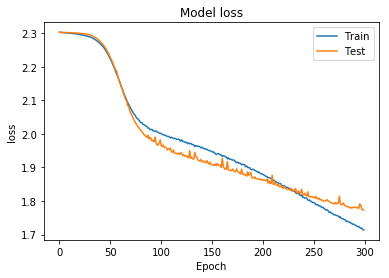

In [175]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

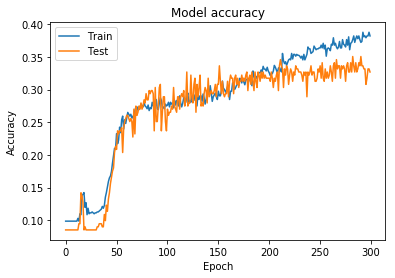

In [176]:
# Sigmoid
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [177]:
# Saving the model#

In [178]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\CGU\Downloads\ASR on speech emotion recogination\saved_models\Emotion_Voice_Detection_Model.h5 


In [179]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [180]:
# Loading the model from the saved loction #

In [181]:
# loading json and creating model #
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 32.70%


In [182]:
# Predicting emotions on the test data #

In [183]:
preds = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)

211/211 [==============================] - 0s 2ms/step


In [184]:
preds

array([[0.04757684, 0.00310293, 0.03687546, ..., 0.07356796, 0.25743842,
        0.03565211],
       [0.0176785 , 0.17252332, 0.02690239, ..., 0.02968681, 0.07071432,
        0.21910876],
       [0.12542363, 0.01252922, 0.1450623 , ..., 0.16133185, 0.12257609,
        0.06337293],
       ...,
       [0.1314088 , 0.02363821, 0.13378239, ..., 0.22341125, 0.05199859,
        0.09601987],
       [0.11855293, 0.00655286, 0.16143636, ..., 0.14898366, 0.13525464,
        0.04795504],
       [0.27042973, 0.00086236, 0.17845772, ..., 0.27317396, 0.02929329,
        0.01686252]], dtype=float32)

In [185]:
preds1=preds.argmax(axis=1)

In [186]:
preds1

array([5, 6, 3, 8, 8, 8, 4, 0, 9, 6, 3, 5, 9, 1, 4, 9, 5, 5, 7, 1, 8, 9,
       1, 0, 2, 0, 1, 2, 0, 6, 1, 0, 9, 1, 2, 8, 7, 6, 2, 5, 5, 5, 7, 4,
       7, 7, 0, 1, 1, 2, 2, 5, 7, 8, 1, 4, 0, 4, 5, 5, 2, 7, 7, 8, 8, 1,
       7, 7, 1, 5, 6, 8, 5, 6, 6, 1, 7, 9, 2, 0, 0, 0, 6, 3, 5, 8, 5, 9,
       5, 9, 6, 2, 1, 1, 5, 4, 1, 4, 1, 8, 7, 3, 9, 3, 1, 1, 7, 8, 2, 2,
       5, 5, 4, 4, 7, 7, 1, 4, 8, 6, 1, 5, 1, 0, 6, 0, 1, 3, 7, 1, 0, 5,
       5, 9, 0, 5, 1, 1, 4, 0, 2, 9, 3, 1, 5, 1, 6, 8, 8, 0, 6, 6, 5, 0,
       5, 5, 6, 8, 5, 5, 1, 1, 4, 1, 7, 1, 8, 7, 7, 4, 7, 5, 6, 5, 1, 1,
       0, 1, 0, 3, 1, 8, 9, 7, 6, 9, 6, 6, 2, 1, 6, 7, 6, 0, 1, 0, 7, 5,
       8, 0, 1, 7, 6, 3, 6, 9, 4, 2, 7, 5, 7], dtype=int64)

In [187]:
abc = preds1.astype(int).flatten()

In [188]:
predictions = (lb.inverse_transform((abc)))

In [189]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_angry
1,male_calm
2,female_happy
3,male_happy
4,male_happy
5,male_happy
6,female_sad
7,female_angry
8,male_sad
9,male_calm


In [190]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [191]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_angry
1,female_calm
2,male_happy
3,male_happy
4,male_happy
5,male_sad
6,female_sad
7,female_happy
8,female_sad
9,male_sad


In [192]:
finaldf = actualdf.join(preddf)

In [193]:
# The % of the Actual emotions v/s the Predicted emotions #

In [194]:
finaldf[70:100]

,actualvalues,predictedvalues
70,male_sad,male_calm
71,male_happy,male_happy
72,male_angry,male_angry
73,male_calm,male_calm
74,female_calm,male_calm
75,female_sad,female_calm
76,female_happy,male_fearful
77,female_fearful,male_sad
78,female_fearful,female_fearful
79,male_angry,female_angry


In [195]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,18
female_calm,18
female_fearful,20
female_happy,21
female_sad,28
male_angry,23
male_calm,18
male_fearful,21
male_happy,23


In [196]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,22
female_calm,38
female_fearful,14
female_happy,9
female_sad,14
male_angry,32
male_calm,23
male_fearful,26
male_happy,19


In [197]:
                                         # real time Input speech #

In [198]:
# Change the file name after RawData/     .wav
data, sampling_rate = librosa.load('SAVEE Dataset/01-01-01-01 (25).wav')

Populating the interactive namespace from numpy and matplotlib


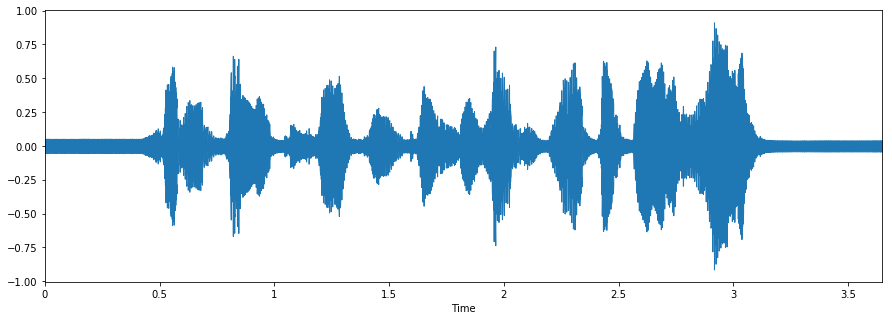

In [199]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

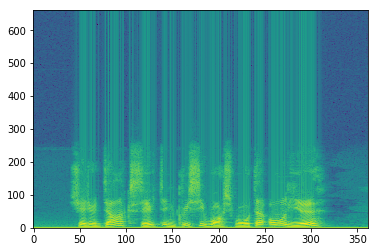

In [200]:
sr,x = scipy.io.wavfile.read('SAVEE Dataset/01-01-01-01 (25).wav')
## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)
X = np.zeros( (len(nn), nfft//2) )
for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))
plt.imshow(X.T, interpolation='nearest',origin='lower',aspect='auto')
plt.show()

In [201]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('SAVEE Dataset/01-01-01-01 (25).wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [217]:
from oct2py import octave as oct
oct.eval("'SAVEE Dataset/01-01-01-01 (25).wav'")
oct.eval("myscript")
oct.eval("'SAVEE Dataset/01-01-01-01 (25).wav'")

OSError: octave-cli not found, please see README

In [216]:
!pip install octave-kernel

In [68]:
livedf2= pd.DataFrame(data=livedf2)

In [69]:
livedf2 = livedf2.stack().to_frame().T

In [70]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-11.113933,-7.215754,-6.219192,-5.926543,-5.850419,-4.808961,-2.513001,-3.500538,-3.721046,-4.487559,...,-4.088851,-5.023862,-5.254715,-5.234093,-5.310309,-5.621665,-6.072197,-6.611349,-2.509087,1.964607


In [71]:
twodim= np.expand_dims(livedf2, axis=2)

In [72]:
livepreds = loaded_model.predict(twodim, batch_size=32, verbose=1)

1/1 [==============================] - 0s 3ms/step


In [73]:
livepreds

array([[9.5450977e-14, 0.0000000e+00, 6.4166480e-12, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 3.1479106e-17,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [74]:
livepreds1=livepreds.argmax(axis=1)

In [75]:
liveabc = livepreds1.astype(int).flatten()

In [76]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_angry'], dtype=object)

                                                        # The end #